In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from scipy.cluster import hierarchy
from sklearn.model_selection import cross_val_predict
import sklearn.model_selection as ms

import statsmodels.api as sm

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
fte = pd.read_csv("data/president_primary_polls.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
fte

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.0
1,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Sanders,13257,Bernard Sanders,28.0
2,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,False,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0
3,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,False,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Sanders,13257,Bernard Sanders,30.0
4,121367,65683,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Sanders,13257,Bernard Sanders,20.0
18633,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Booker,13287,Cory A. Booker,5.0
18634,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Harris,13288,Kamala D. Harris,5.0
18635,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Bloomberg,13289,Michael Bloomberg,5.0


In [4]:
ygPoll = fte["pollster"] == "YouGov" 


In [5]:
yg = fte[ygPoll]

In [12]:
bidenBool = fte["candidate_name"] == "Joseph R. Biden Jr."
biden = fte[bidenBool]

In [13]:
biden

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name
0,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.0,Joseph R. Biden Jr.
2,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0,Joseph R. Biden Jr.
4,121367,65683,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,61.0,Joseph R. Biden Jr.
6,121362,65680,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,144.0,...,4/6/20 16:49,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,62.0,Joseph R. Biden Jr.
8,120693,65045,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18560,92395,57007,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,133.0,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,25.0,Joseph R. Biden Jr.
18568,92396,57007,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,133.0,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.
18608,92394,57181,2020,Massachusetts,568,YouGov,278,UMass Amherst,YouGov,391.0,...,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.
18610,92393,56853,2020,NaN,1189,Morning Consult,538,Politico,Morning Consult,218.0,...,12/27/18 03:57,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,26.0,Joseph R. Biden Jr.


In [24]:
pollsterDict = dict()
timestamps = list()
for index, row in biden.iterrows():
    if(row["pollster"] not in pollsterDict):
        pollsterDict[row["pollster"]] = [{pd.to_datetime(row["start_date"]):row["pct"]}]
    else:
        pollsterDict[row["pollster"]].append({pd.to_datetime(row["start_date"]):row["pct"]})
    timestamps.append(pd.to_datetime(row["start_date"]))

In [22]:
pollsterDict["YouGov"]

[{Timestamp('2020-04-05 00:00:00'): 49.0},
 {Timestamp('2020-03-29 00:00:00'): 47.0},
 {Timestamp('2020-03-22 00:00:00'): 47.0},
 {Timestamp('2020-03-15 00:00:00'): 48.0},
 {Timestamp('2020-03-08 00:00:00'): 53.0},
 {Timestamp('2020-03-06 00:00:00'): 54.0},
 {Timestamp('2020-03-06 00:00:00'): 59.0},
 {Timestamp('2020-03-06 00:00:00'): 49.0},
 {Timestamp('2020-03-01 00:00:00'): 28.0},
 {Timestamp('2020-02-27 00:00:00'): 19.0},
 {Timestamp('2020-02-27 00:00:00'): 26.0},
 {Timestamp('2020-02-26 00:00:00'): 19.0},
 {Timestamp('2020-02-26 00:00:00'): 21.0},
 {Timestamp('2020-02-23 00:00:00'): 20.0},
 {Timestamp('2020-02-18 00:00:00'): 12.0},
 {Timestamp('2020-02-20 00:00:00'): 28.0},
 {Timestamp('2020-02-20 00:00:00'): 17.0},
 {Timestamp('2020-02-11 00:00:00'): 20.0},
 {Timestamp('2020-02-11 00:00:00'): 16.0},
 {Timestamp('2020-02-11 00:00:00'): 12.9},
 {Timestamp('2020-02-16 00:00:00'): 18.0},
 {Timestamp('2020-02-06 00:00:00'): 20.4},
 {Timestamp('2020-02-01 00:00:00'): 21.4},
 {Timestamp

In [32]:
biden.insert(2, "startDateTs", timestamps, True)

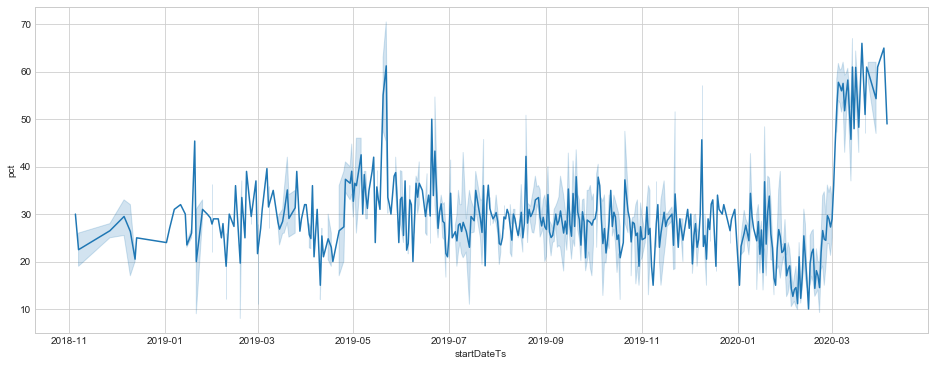

In [37]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=biden["startDateTs"], y=biden["pct"], data=biden)

In [34]:
biden["startDateTs"]

0       2020-04-05
2       2020-04-03
4       2020-03-30
6       2020-03-29
8       2020-03-29
           ...    
18560   2018-11-27
18568   2018-11-27
18608   2018-11-07
18610   2018-11-07
18631   2018-11-05
Name: startDateTs, Length: 1267, dtype: datetime64[ns]

In [38]:
biden.pollster.unique()

array(['YouGov', 'SSRS', 'Morning Consult', 'IBD/TIPP',
       'Harris Insights & Analytics', 'Marquette University Law School',
       'ABC News/Washington Post', 'Echelon Insights', 'Ipsos',
       'Lord Ashcroft Polls', 'Emerson College', 'Swayable', 'AtlasIntel',
       'Marist College', 'Monmouth University', 'University of Georgia',
       'Point Blank Political', 'NBC News/Wall Street Journal',
       'Gravis Marketing', 'Latino Decisions', 'ROI Rocket',
       'Hofstra University', 'Sacred Heart University',
       'Public Policy Polling', 'University of North Florida',
       'Chism Strategies', 'Data for Progress', 'Optimus',
       'Victory Research', 'Mitchell Research & Communications',
       'Ogden & Fry', 'Target Insyght', 'Concord Public Opinion Partners',
       'St. Pete Polls', 'Quinnipiac University',
       'Florida Atlantic University', 'SurveyUSA', 'EPIC-MRA',
       'Remington Research Group', 'OH Predictive Insights/MBQF',
       'Change Research', 'Spry Strat

In [39]:
bidenYouGov = biden[biden["pollster"] == "YouGov"]

In [40]:
timestamps = list()
for index, row in bidenYouGov.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))

In [45]:
bidenYouGov.insert(2, "start_DateTs", timestamps, True)

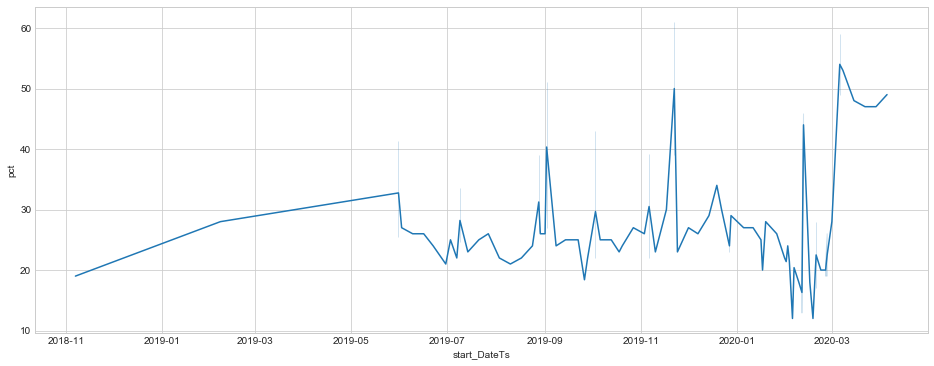

In [46]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=bidenYouGov["start_DateTs"], y=bidenYouGov["pct"], data=bidenYouGov)

In [47]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenSurveyUSA = biden[biden["pollster"] == "SurveyUSA"]

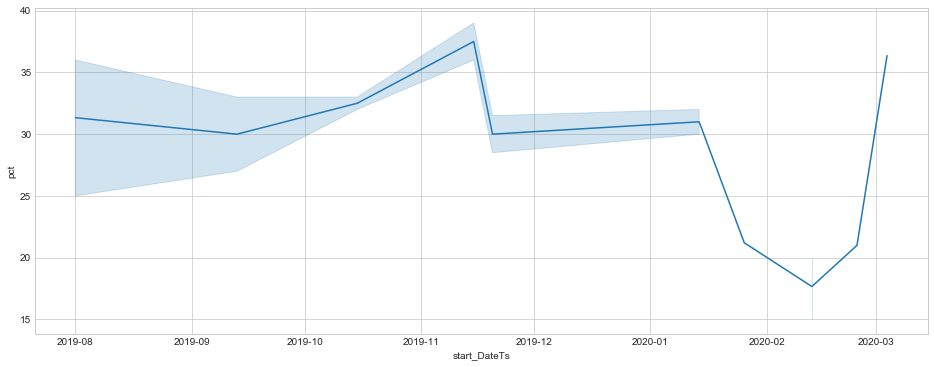

In [50]:
timestamps = list()
for index, row in bidenSurveyUSA.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenSurveyUSA.insert(2, "start_DateTs", timestamps, True)
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=bidenSurveyUSA["start_DateTs"], y=bidenSurveyUSA["pct"], data=bidenSurveyUSA)

In [52]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenMonmouth = biden[biden["pollster"] == "Monmouth University"]
timestamps = list()
for index, row in bidenMonmouth.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenMonmouth.insert(2, "start_DateTs", timestamps, True)

In [59]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenABC = biden[biden["pollster"] == "ABC News/Washington Post"]
timestamps = list()
for index, row in bidenABC.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenABC.insert(2, "start_DateTs", timestamps, True)

In [ ]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenABC = biden[biden["pollster"] == "ABC News/Washington Post"]
timestamps = list()
for index, row in bidenABC.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenABC.insert(2, "start_DateTs", timestamps, True)

In [64]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenSeltzer = biden[biden["pollster"] == "Selzer & Co."]
timestamps = list()
for index, row in bidenSeltzer.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenSeltzer.insert(2, "start_DateTs", timestamps, True)

In [102]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenMuhlenberg = biden[biden["pollster"] == "Emerson College"]
timestamps = list()
for index, row in bidenMuhlenberg.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenMuhlenberg.insert(2, "start_DateTs", timestamps, True)

In [109]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenSuffolk = biden[biden["pollster"] == "Suffolk University"]
timestamps = list()
for index, row in bidenSuffolk.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenSuffolk.insert(2, "start_DateTs", timestamps, True)

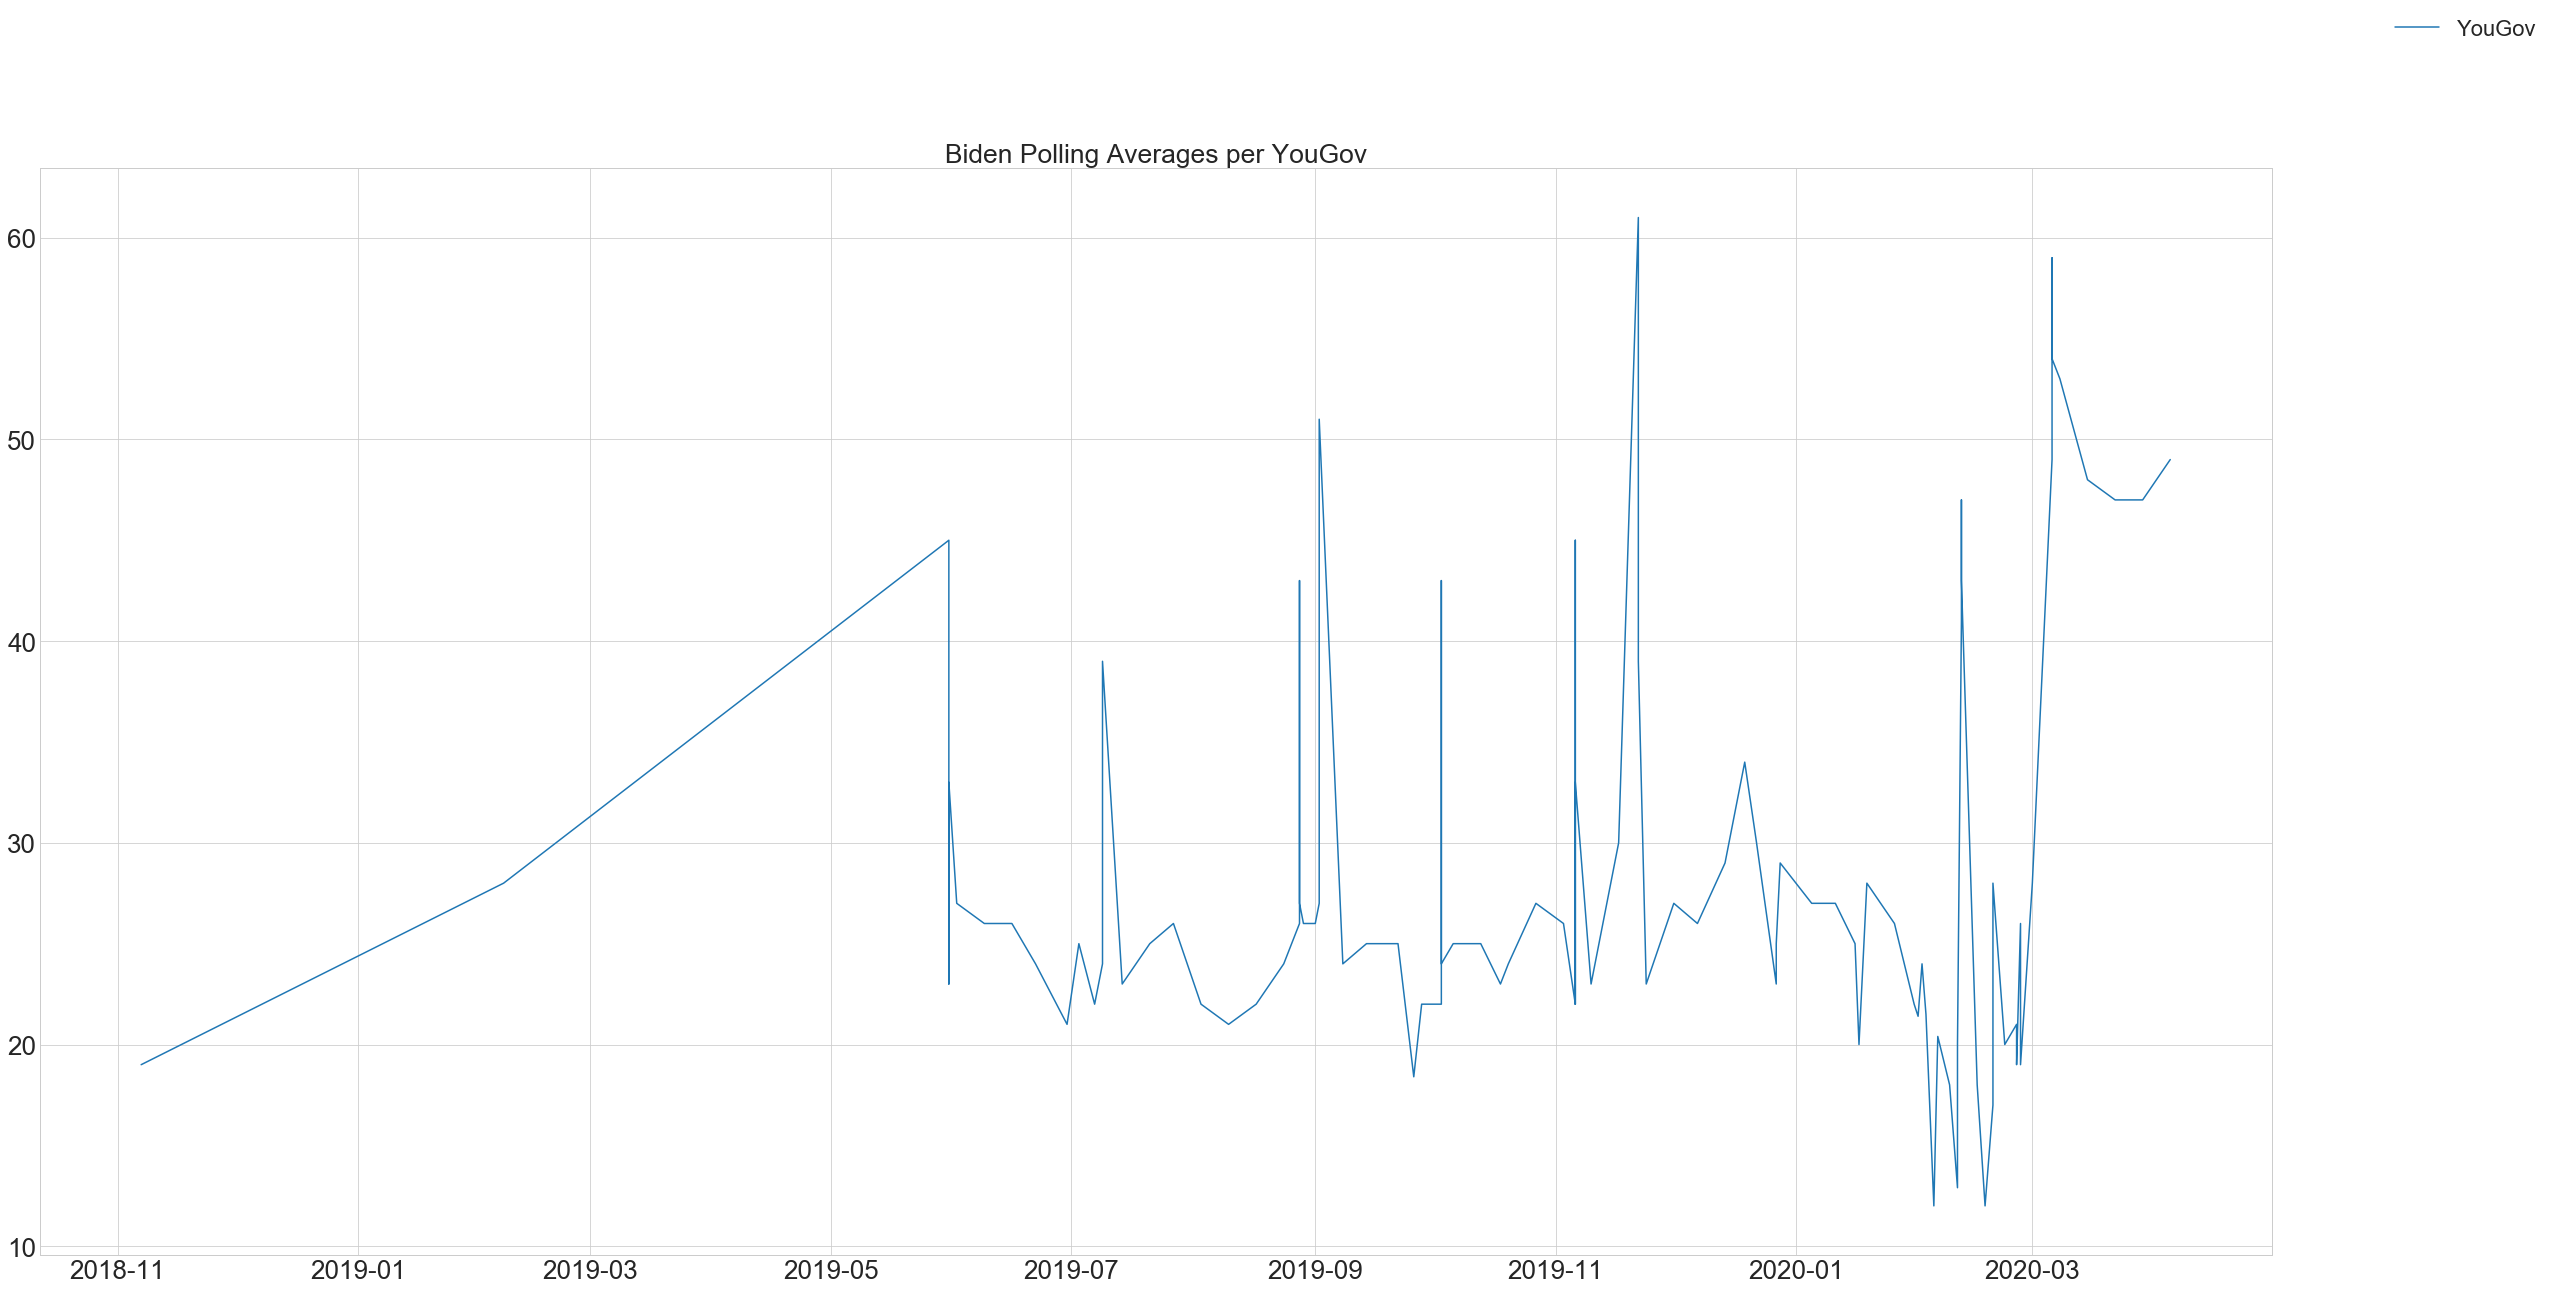

In [132]:
fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(bidenYouGov["start_DateTs"], bidenYouGov["pct"])
#plt.plot(bidenSurveyUSA["start_DateTs"], bidenSurveyUSA["pct"])
#plt.plot(bidenMonmouth["start_DateTs"], bidenMonmouth["pct"])
#plt.plot(bidenABC["start_DateTs"], bidenABC["pct"])
#plt.plot(bidenSeltzer["start_DateTs"], bidenSeltzer["pct"])
#plt.plot(bidenMuhlenberg["start_DateTs"], bidenMuhlenberg["pct"])
#plt.plot(bidenSuffolk["start_DateTs"], bidenSuffolk["pct"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Biden Polling Averages per YouGov")
plt.show()

In [123]:
bidenYouGov = bidenYouGov.sort_values("start_DateTs", ascending = True)

In [125]:
bidenYouGov

,question_id,poll_id,start_DateTs,start_DateTsioi,startDateTssdf,startDateTsbad,start_date_tsbad,cycle,state,pollster_id,...,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name,start_date_ts
18608,92394,57181,2018-11-07,2018-11-07,2018-11-07,2018-11-07,2018-11-07,2020,Massachusetts,568,...,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.,2018-11-07
17866,93245,57557,2019-02-07,2019-02-07,2019-02-07,2019-02-07,2019-02-07,2020,New Hampshire,568,...,NaN,https://www.umass.edu/newsoffice/article/presi...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.,2019-02-07
14669,98020,58470,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,South Carolina,568,...,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVN...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,45.0,Joseph R. Biden Jr.,2019-05-31
14621,98018,58468,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,Iowa,568,...,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVS...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0,Joseph R. Biden Jr.,2019-05-31
14877,98023,58471,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,Texas,568,...,NaN,https://www.texastribune.org/2019/06/17/trump-...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,23.0,Joseph R. Biden Jr.,2019-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,119899,64794,2020-03-08,2020-03-08,2020-03-08,2020-03-08,2020-03-08,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/vrbl9mmctz/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,53.0,Joseph R. Biden Jr.,2020-03-08
42,120147,64872,2020-03-15,2020-03-15,2020-03-15,2020-03-15,2020-03-15,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/fcdckgt368/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,48.0,Joseph R. Biden Jr.,2020-03-15
22,120488,64980,2020-03-22,2020-03-22,2020-03-22,2020-03-22,2020-03-22,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/bfiid7tfh3/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.,2020-03-22
8,120693,65045,2020-03-29,2020-03-29,2020-03-29,2020-03-29,2020-03-29,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.,2020-03-29


### Removing outliers from YouGov data

In [133]:
bidenYouGov

,question_id,poll_id,start_DateTs,start_DateTsioi,startDateTssdf,startDateTsbad,start_date_tsbad,cycle,state,pollster_id,...,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name,start_date_ts
18608,92394,57181,2018-11-07,2018-11-07,2018-11-07,2018-11-07,2018-11-07,2020,Massachusetts,568,...,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.,2018-11-07
17866,93245,57557,2019-02-07,2019-02-07,2019-02-07,2019-02-07,2019-02-07,2020,New Hampshire,568,...,NaN,https://www.umass.edu/newsoffice/article/presi...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.,2019-02-07
14669,98020,58470,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,South Carolina,568,...,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVN...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,45.0,Joseph R. Biden Jr.,2019-05-31
14621,98018,58468,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,Iowa,568,...,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVS...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0,Joseph R. Biden Jr.,2019-05-31
14877,98023,58471,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,Texas,568,...,NaN,https://www.texastribune.org/2019/06/17/trump-...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,23.0,Joseph R. Biden Jr.,2019-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,119899,64794,2020-03-08,2020-03-08,2020-03-08,2020-03-08,2020-03-08,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/vrbl9mmctz/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,53.0,Joseph R. Biden Jr.,2020-03-08
42,120147,64872,2020-03-15,2020-03-15,2020-03-15,2020-03-15,2020-03-15,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/fcdckgt368/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,48.0,Joseph R. Biden Jr.,2020-03-15
22,120488,64980,2020-03-22,2020-03-22,2020-03-22,2020-03-22,2020-03-22,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/bfiid7tfh3/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.,2020-03-22
8,120693,65045,2020-03-29,2020-03-29,2020-03-29,2020-03-29,2020-03-29,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.,2020-03-29


In [170]:
rowsToDrop = list()
changes = list()
for i in range(0, len(bidenYouGov)-1) : 
    change = abs(bidenYouGov.iloc[i+1, 37] - bidenYouGov.iloc[i, 37])
    changes.append(change)
    if(change >= 10):
        rowsToDrop.append(i)
changes.sort(reverse=True)
print(changes)
noExtremities = bidenYouGov.reset_index().drop(rowsToDrop)

[31.0, 27.0, 25.0, 23.0, 23.0, 22.0, 21.0, 21.0, 21.0, 19.0, 17.0, 16.0, 16.0, 16.0, 16.0, 15.0, 14.0, 12.0, 11.0, 11.0, 10.0, 10.0, 10.0, 9.5, 9.0, 9.0, 8.399999999999999, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.600000000000001, 6.0, 6.0, 5.1, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.6000000000000014, 3.0999999999999996, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.6000000000000014, 2.5, 2.3999999999999986, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6000000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


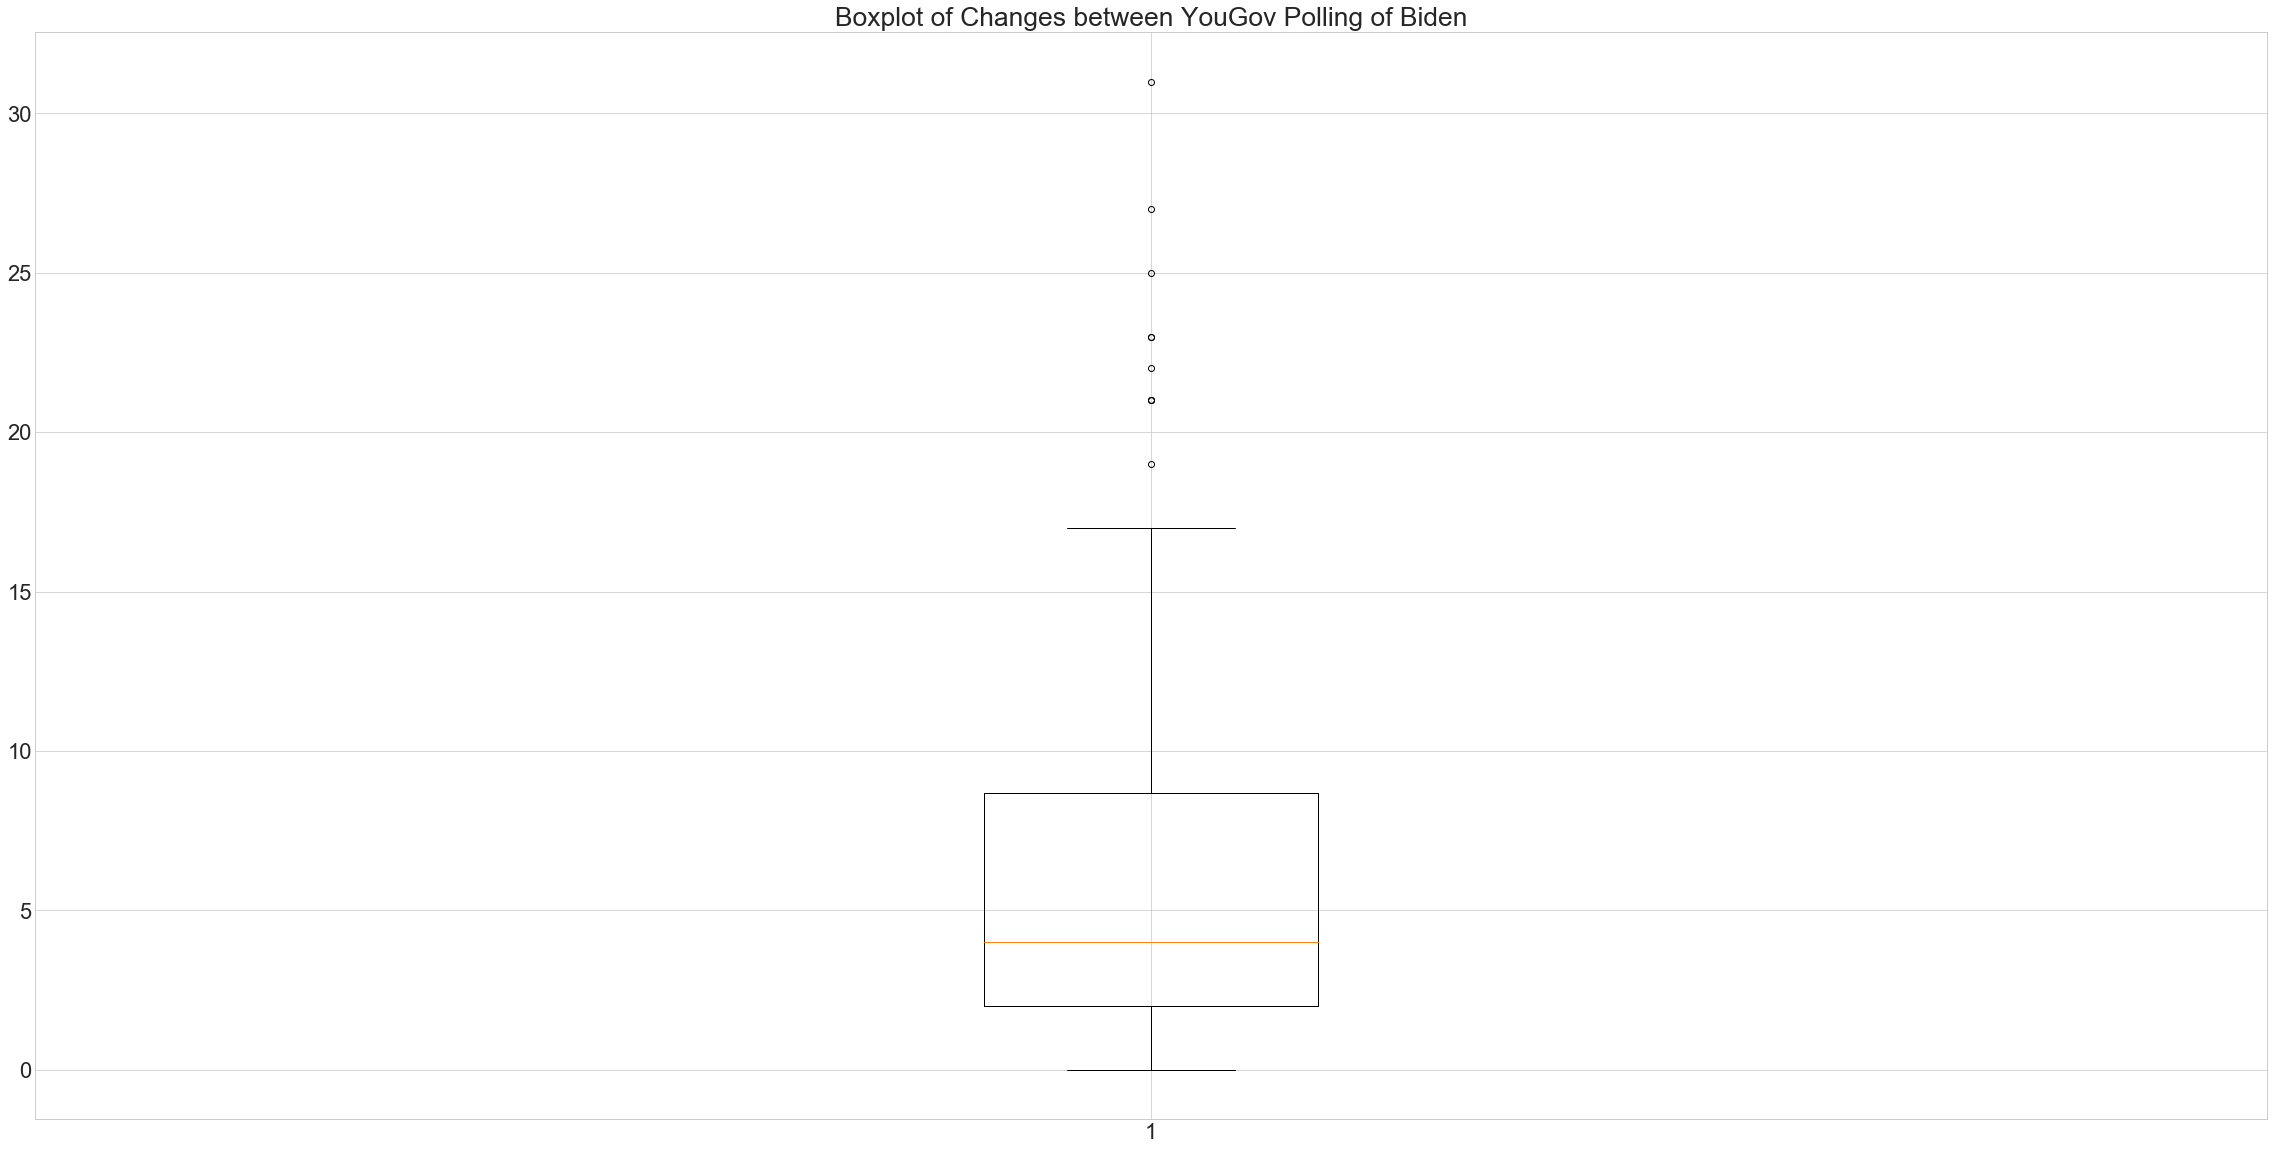

In [171]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of Changes between YouGov Polling of Biden')
ax1.boxplot(changes)
plt.show()

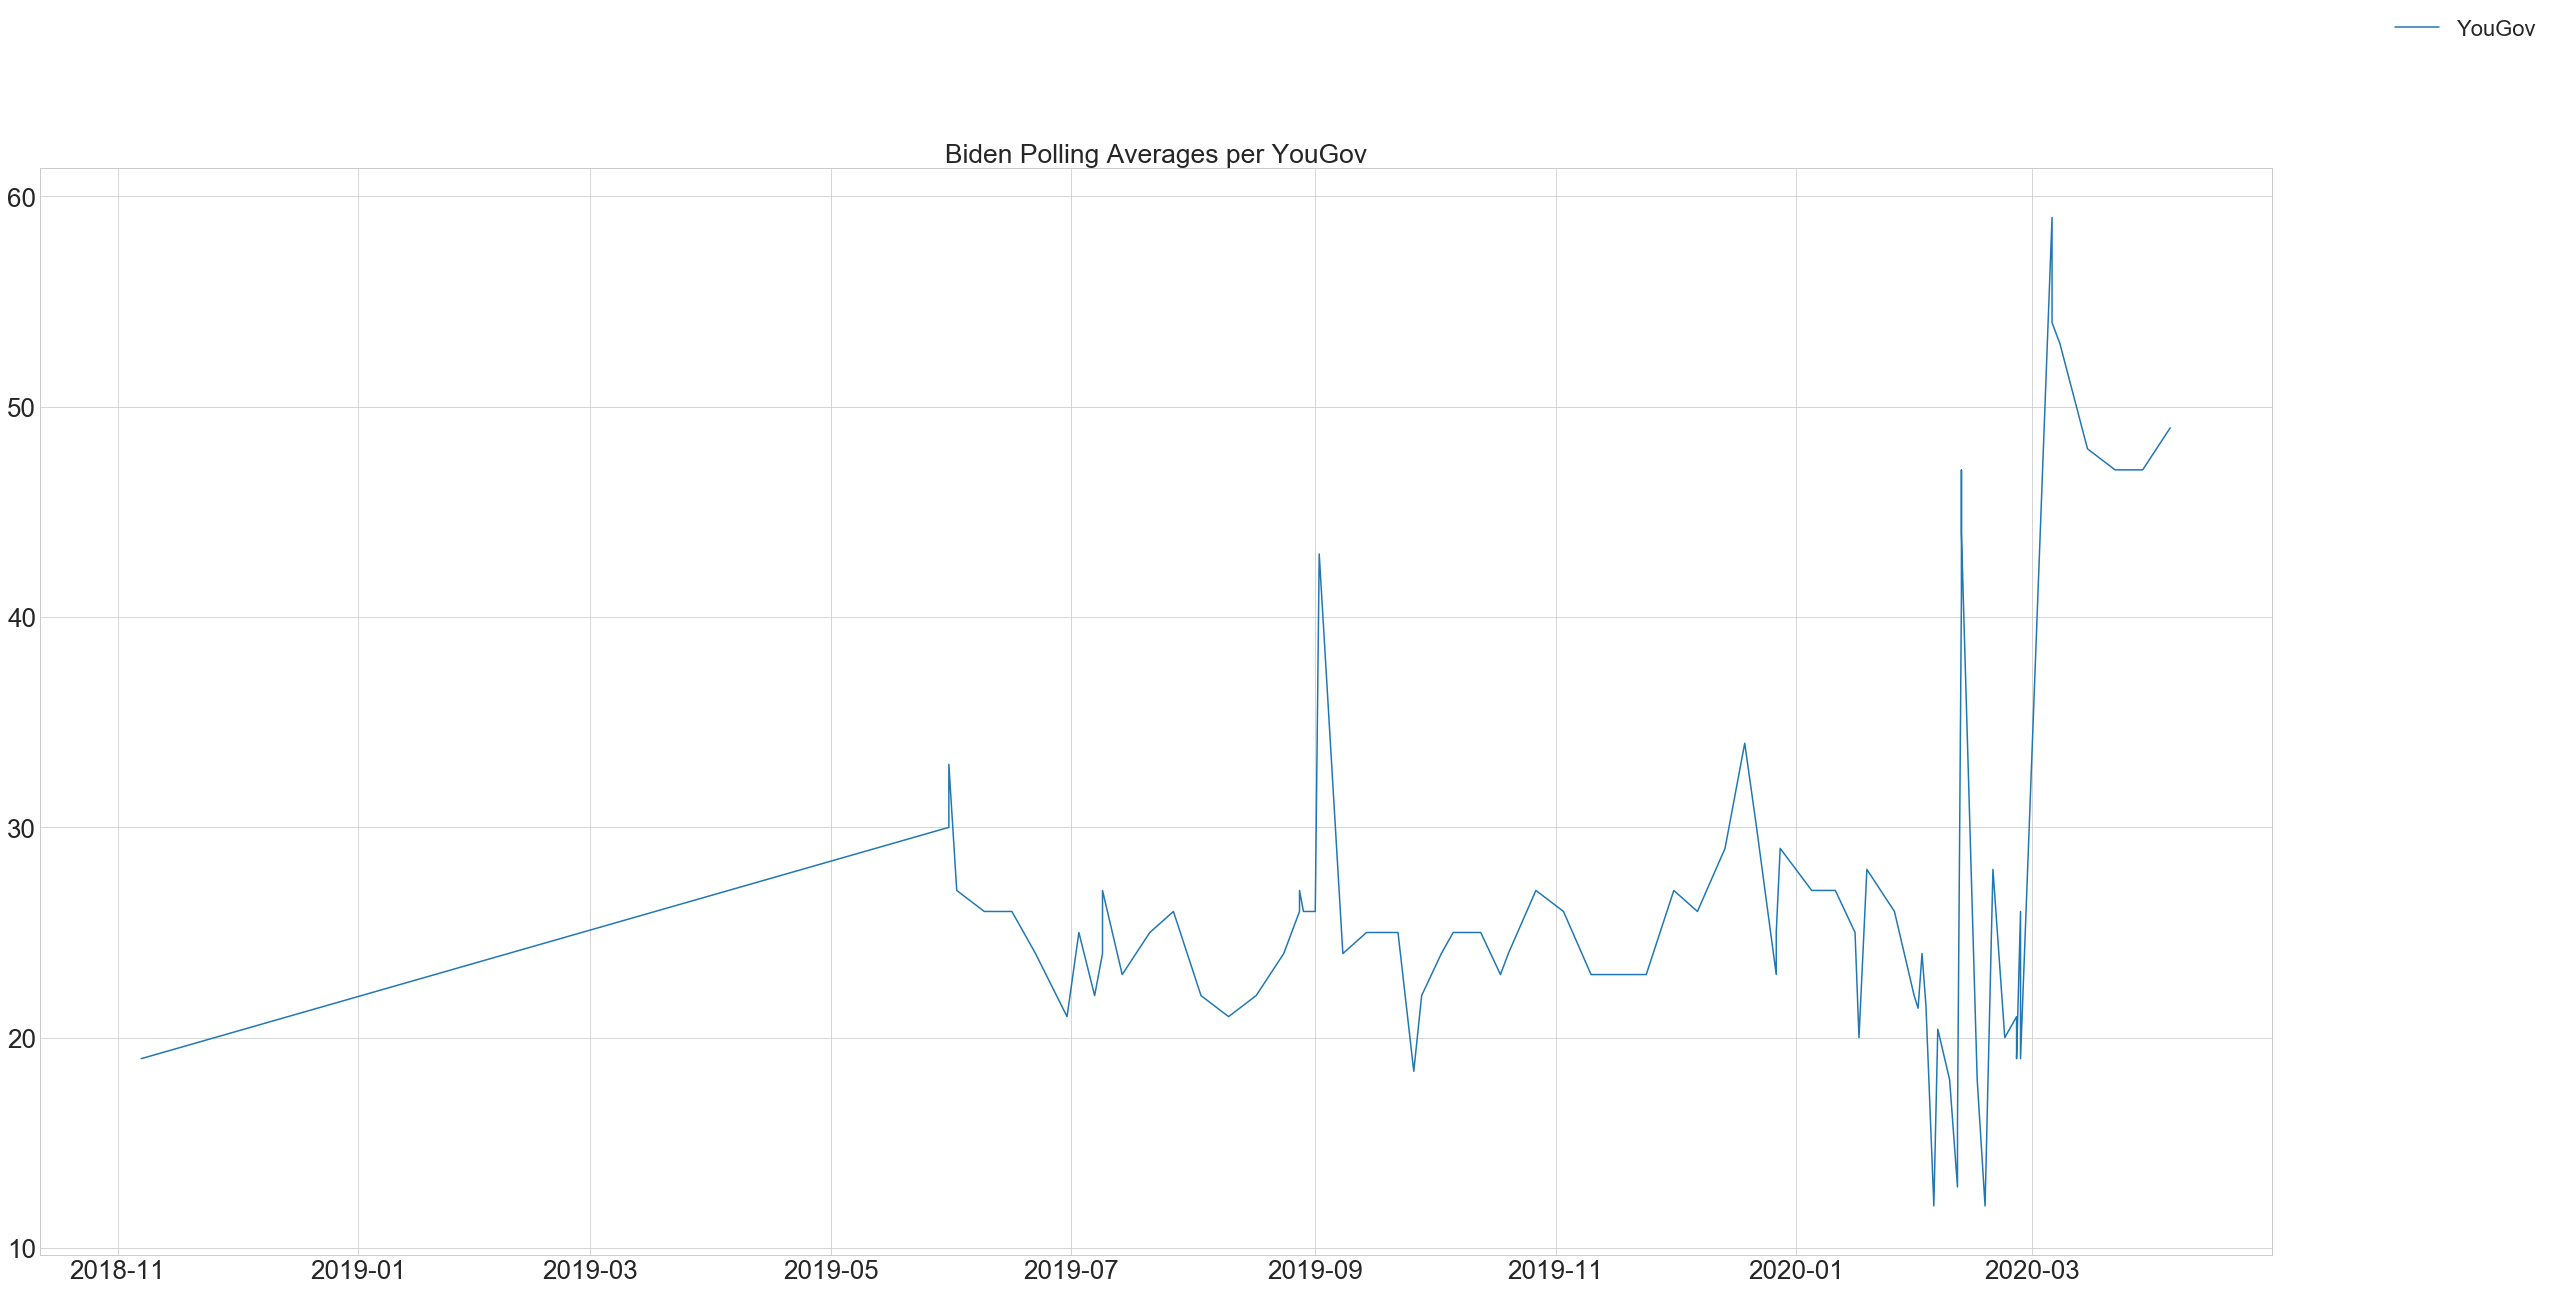

In [172]:
fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(noExtremities["start_DateTs"], noExtremities["pct"])
#plt.plot(bidenSurveyUSA["start_DateTs"], bidenSurveyUSA["pct"])
#plt.plot(bidenMonmouth["start_DateTs"], bidenMonmouth["pct"])
#plt.plot(bidenABC["start_DateTs"], bidenABC["pct"])
#plt.plot(bidenSeltzer["start_DateTs"], bidenSeltzer["pct"])
#plt.plot(bidenMuhlenberg["start_DateTs"], bidenMuhlenberg["pct"])
#plt.plot(bidenSuffolk["start_DateTs"], bidenSuffolk["pct"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Biden Polling Averages per YouGov")
plt.show()

In [145]:
noExtremities

,question_id,poll_id,start_DateTs,start_DateTsioi,startDateTssdf,startDateTsbad,start_date_tsbad,cycle,state,pollster_id,...,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name,start_date_ts
18608,92394,57181,2018-11-07,2018-11-07,2018-11-07,2018-11-07,2018-11-07,2020,Massachusetts,568,...,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.,2018-11-07
17866,93245,57557,2019-02-07,2019-02-07,2019-02-07,2019-02-07,2019-02-07,2020,New Hampshire,568,...,NaN,https://www.umass.edu/newsoffice/article/presi...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.,2019-02-07
14669,98020,58470,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,South Carolina,568,...,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVN...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,45.0,Joseph R. Biden Jr.,2019-05-31
14621,98018,58468,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,Iowa,568,...,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVS...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0,Joseph R. Biden Jr.,2019-05-31
14877,98023,58471,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,Texas,568,...,NaN,https://www.texastribune.org/2019/06/17/trump-...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,23.0,Joseph R. Biden Jr.,2019-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,119899,64794,2020-03-08,2020-03-08,2020-03-08,2020-03-08,2020-03-08,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/vrbl9mmctz/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,53.0,Joseph R. Biden Jr.,2020-03-08
42,120147,64872,2020-03-15,2020-03-15,2020-03-15,2020-03-15,2020-03-15,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/fcdckgt368/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,48.0,Joseph R. Biden Jr.,2020-03-15
22,120488,64980,2020-03-22,2020-03-22,2020-03-22,2020-03-22,2020-03-22,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/bfiid7tfh3/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.,2020-03-22
8,120693,65045,2020-03-29,2020-03-29,2020-03-29,2020-03-29,2020-03-29,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.,2020-03-29


### Biden Rolling Average

In [173]:
biden

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name
0,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.0,Joseph R. Biden Jr.
2,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0,Joseph R. Biden Jr.
4,121367,65683,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,61.0,Joseph R. Biden Jr.
6,121362,65680,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,144.0,...,4/6/20 16:49,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,62.0,Joseph R. Biden Jr.
8,120693,65045,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18560,92395,57007,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,133.0,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,25.0,Joseph R. Biden Jr.
18568,92396,57007,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,133.0,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.
18608,92394,57181,2020,Massachusetts,568,YouGov,278,UMass Amherst,YouGov,391.0,...,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.
18610,92393,56853,2020,NaN,1189,Morning Consult,538,Politico,Morning Consult,218.0,...,12/27/18 03:57,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,26.0,Joseph R. Biden Jr.


In [174]:
biden.columns

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'start_date',
       'end_date', 'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'created_at', 'notes', 'url', 'stage', 'party',
       'answer', 'candidate_id', 'candidate_name', 'pct', 'candiate_name'],
      dtype='object')

In [175]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
timestamps = list()
for index, row in biden.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
biden.insert(2, "start_date_ts", timestamps, True)

In [176]:
biden

,question_id,poll_id,start_date_ts,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name
0,121390,65691,2020-04-05,2020,NaN,568,YouGov,352,Economist,YouGov,...,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.0,Joseph R. Biden Jr.
2,121424,65687,2020-04-03,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,...,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0,Joseph R. Biden Jr.
4,121367,65683,2020-03-30,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,...,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,61.0,Joseph R. Biden Jr.
6,121362,65680,2020-03-29,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,...,4/6/20 16:49,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,62.0,Joseph R. Biden Jr.
8,120693,65045,2020-03-29,2020,NaN,568,YouGov,352,Economist,YouGov,...,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18560,92395,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,25.0,Joseph R. Biden Jr.
18568,92396,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.
18608,92394,57181,2018-11-07,2020,Massachusetts,568,YouGov,278,UMass Amherst,YouGov,...,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.
18610,92393,56853,2018-11-07,2020,NaN,1189,Morning Consult,538,Politico,Morning Consult,...,12/27/18 03:57,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,26.0,Joseph R. Biden Jr.


In [177]:
biden = biden.sort_values("start_date_ts", ascending = True)

In [178]:
biden

,question_id,poll_id,start_date_ts,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name
18631,92392,57184,2018-11-05,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,...,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0,Joseph R. Biden Jr.
18610,92393,56853,2018-11-07,2020,NaN,1189,Morning Consult,538,Politico,Morning Consult,...,12/27/18 03:57,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,26.0,Joseph R. Biden Jr.
18608,92394,57181,2018-11-07,2020,Massachusetts,568,YouGov,278,UMass Amherst,YouGov,...,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.
18568,92396,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.
18560,92395,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,25.0,Joseph R. Biden Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,120693,65045,2020-03-29,2020,NaN,568,YouGov,352,Economist,YouGov,...,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.
6,121362,65680,2020-03-29,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,...,4/6/20 16:49,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,62.0,Joseph R. Biden Jr.
4,121367,65683,2020-03-30,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,...,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,61.0,Joseph R. Biden Jr.
2,121424,65687,2020-04-03,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,...,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0,Joseph R. Biden Jr.


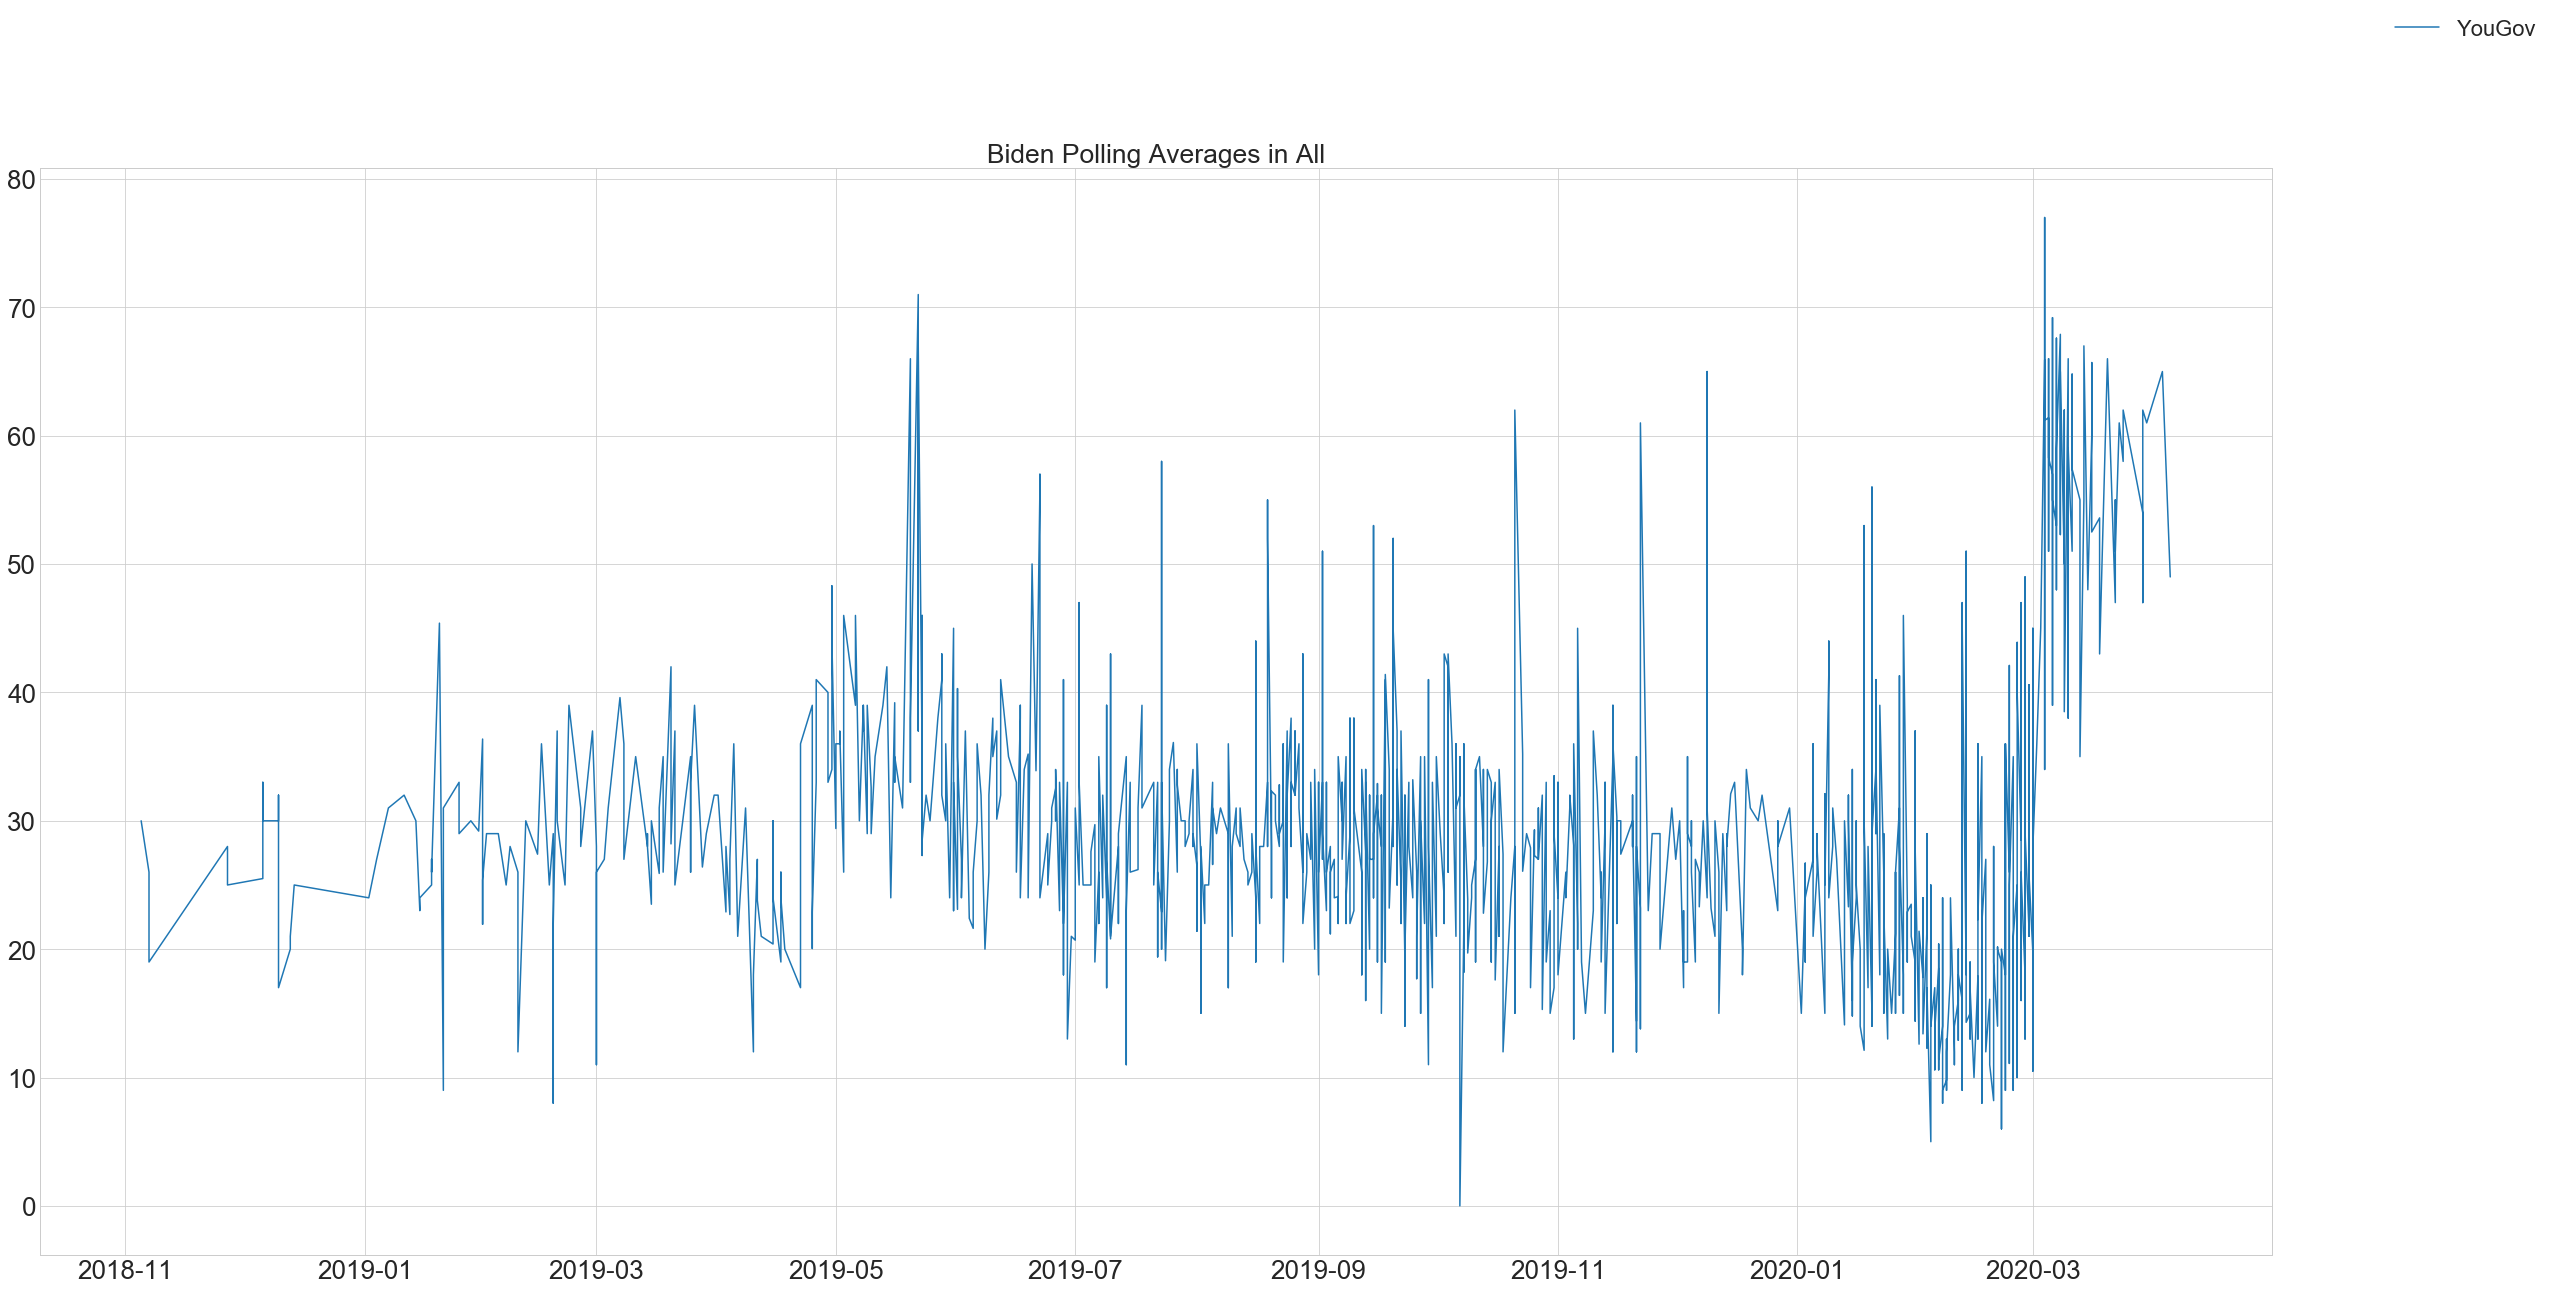

In [179]:
fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(biden["start_date_ts"], biden["pct"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Biden Polling Averages in All")
plt.show()

In [180]:
biden.set_index("start_date_ts", inplace = True)

In [224]:
rolling = biden.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
biden["rolling_mean"] = rolling_mean["pct"]

IndexError: list assignment index out of range

In [225]:
biden = biden.reset_index()
biden

fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(biden["start_date_ts"], biden["rolling_mean"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Biden Rolling Polling Averages in All")
plt.show()

ValueError: cannot insert level_0, already exists

In [196]:
fte

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name
0,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.0,Joseph R. Biden Jr.
1,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Sanders,13257,Bernard Sanders,28.0,Joseph R. Biden Jr.
2,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0,Joseph R. Biden Jr.
3,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Sanders,13257,Bernard Sanders,30.0,Joseph R. Biden Jr.
4,121367,65683,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,61.0,Joseph R. Biden Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Sanders,13257,Bernard Sanders,20.0,Joseph R. Biden Jr.
18633,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Booker,13287,Cory A. Booker,5.0,Joseph R. Biden Jr.
18634,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Harris,13288,Kamala D. Harris,5.0,Joseph R. Biden Jr.
18635,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Bloomberg,13289,Michael Bloomberg,5.0,Joseph R. Biden Jr.


In [206]:
sanders = fte[fte["candidate_name"] == "Bernard Sanders"]
timestamps = list()
for index, row in sanders.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
sanders.insert(2, "start_date_ts", timestamps, True)
sanders = sanders.sort_values("start_date_ts", ascending = True)

In [207]:
sanders

,question_id,poll_id,start_date_ts,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name
18632,92392,57184,2018-11-05,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,...,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Sanders,13257,Bernard Sanders,20.0,Joseph R. Biden Jr.
18611,92393,56853,2018-11-07,2020,NaN,1189,Morning Consult,538,Politico,Morning Consult,...,12/27/18 03:57,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Sanders,13257,Bernard Sanders,19.0,Joseph R. Biden Jr.
18607,92394,57181,2018-11-07,2020,Massachusetts,568,YouGov,278,UMass Amherst,YouGov,...,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Sanders,13257,Bernard Sanders,14.0,Joseph R. Biden Jr.
18567,92396,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Sanders,13257,Bernard Sanders,21.0,Joseph R. Biden Jr.
18559,92395,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Sanders,13257,Bernard Sanders,15.0,Joseph R. Biden Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,120693,65045,2020-03-29,2020,NaN,568,YouGov,352,Economist,YouGov,...,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Sanders,13257,Bernard Sanders,34.0,Joseph R. Biden Jr.
7,121362,65680,2020-03-29,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,...,4/6/20 16:49,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Sanders,13257,Bernard Sanders,30.0,Joseph R. Biden Jr.
5,121367,65683,2020-03-30,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,...,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Sanders,13257,Bernard Sanders,36.0,Joseph R. Biden Jr.
3,121424,65687,2020-04-03,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,...,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Sanders,13257,Bernard Sanders,30.0,Joseph R. Biden Jr.


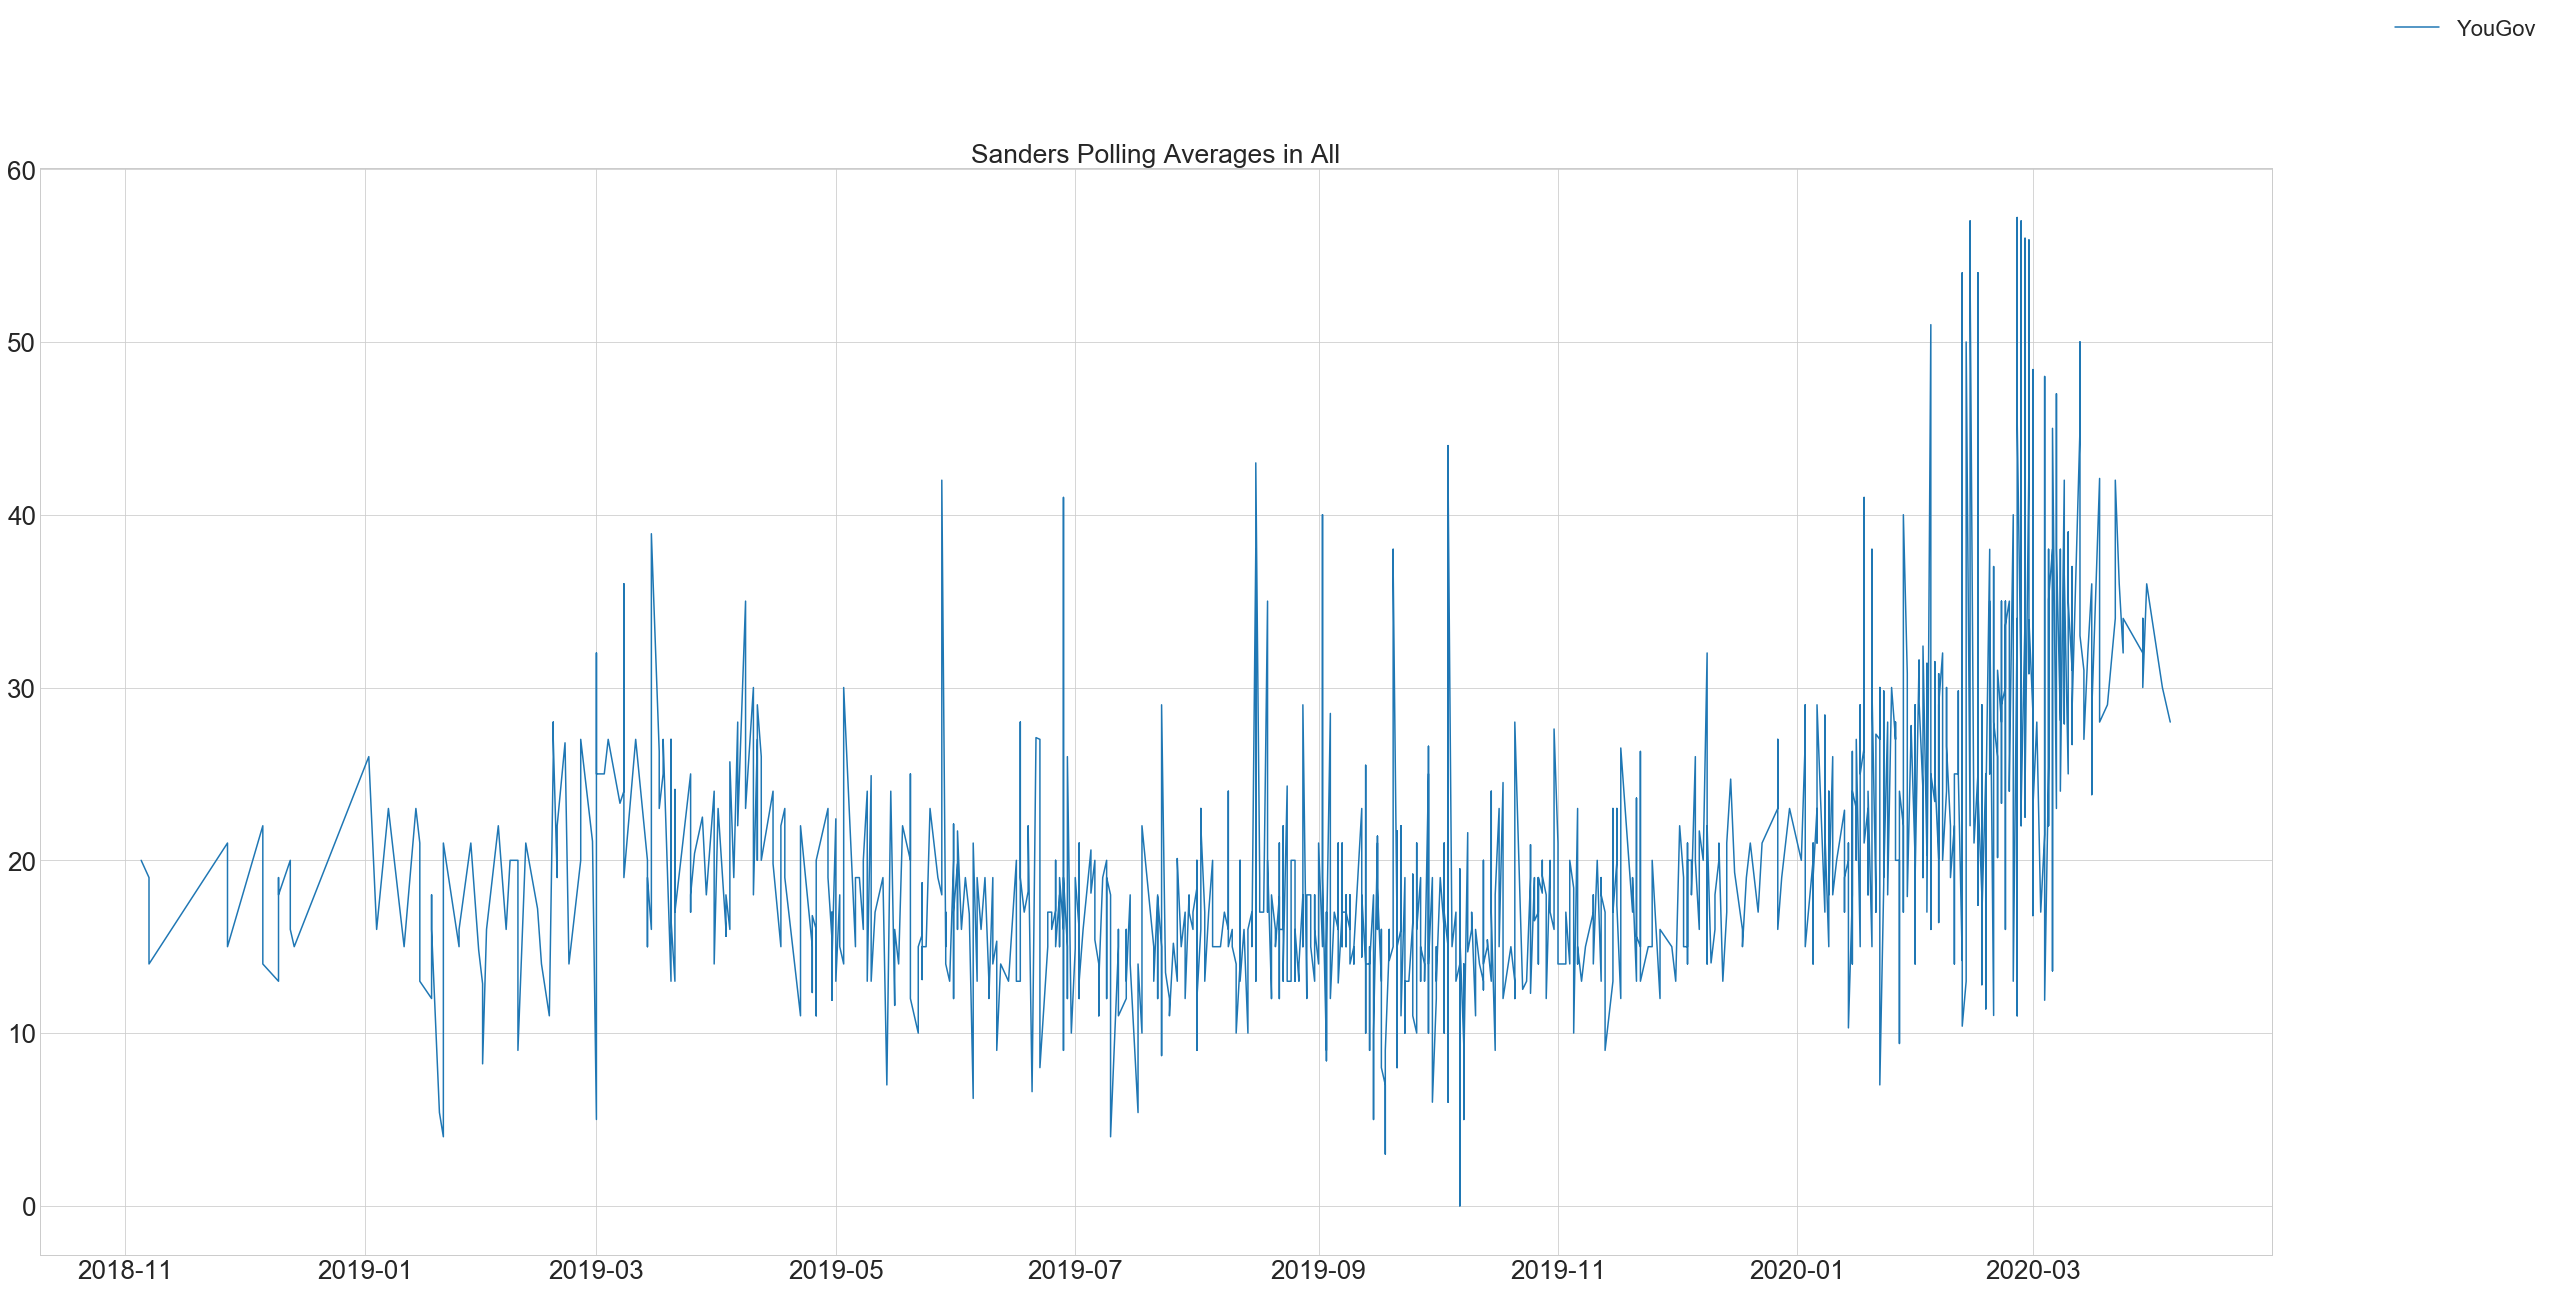

In [208]:
fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(sanders["start_date_ts"], sanders["pct"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Sanders Polling Averages in All")
plt.show()

In [203]:
fte.candidate_name.unique()

array(['Joseph R. Biden Jr.', 'Bernard Sanders', 'Tulsi Gabbard',
       'Elizabeth Warren', 'Michael Bloomberg', 'Pete Buttigieg',
       'Amy Klobuchar', 'Donald Trump', 'William F. Weld', 'Tom Steyer',
       'Andrew Yang', 'Roque De La Fuente', 'Michael F. Bennet',
       'Cory A. Booker', 'Julián Castro', 'John K. Delaney', 'Joe Sestak',
       'Marianne Williamson', 'Joe Walsh', 'Deval Patrick', 'Mosie Boyd',
       'Michael Ellinger', 'Mark Stewart Greenstein', 'Mike Pence',
       'Kamala D. Harris', 'Robert Wells', 'Nathan Bloxham',
       "Beto O'Rourke", 'Steve Bullock', 'Wayne Messam',
       'Kirsten E. Gillibrand', 'Mike Gravel', 'Eric Swalwell',
       'Tim Ryan', 'Hillary Rodham Clinton', 'Bill de Blasio',
       'Jay Robert Inslee', 'John Kerry', 'Mark Sanford',
       'John Hickenlooper', 'Mitt Romney', 'John Richard Kasich',
       'Michelle Obama', 'Seth Moulton', 'Terry R. McAuliffe',
       'Nimrata R. Haley', 'Stacey Yvonne Abrams', 'Bob Corker',
       'Marco Ru

In [209]:
sandersIndexChange = sanders.set_index("start_date_ts")

In [219]:
rolling = sandersIndexChange.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean["pct"])
rolling_mean = rolling_mean.reset_index()
sanders = sanders.reset_index()
sanders.insert(2, "rollingMean", rolling_mean["pct"], True)

start_date_ts
2018-11-05          NaN
2018-11-07          NaN
2018-11-07    17.666667
2018-11-27    18.000000
2018-11-27    16.666667
                ...    
2020-03-29    33.333333
2020-03-29    32.000000
2020-03-30    33.333333
2020-04-03    32.000000
2020-04-05    31.333333
Name: pct, Length: 1271, dtype: float64


In [220]:
sanders

,level_0,index,rollingMean,question_id,poll_id,start_date_ts,cycle,state,pollster_id,pollster,...,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name,rolling_mean
0,0,18632,NaN,92392,57184,2018-11-05,2020,NaN,1416,Harris Insights & Analytics,...,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Sanders,13257,Bernard Sanders,20.0,Joseph R. Biden Jr.,21.2514
1,1,18611,NaN,92393,56853,2018-11-07,2020,NaN,1189,Morning Consult,...,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Sanders,13257,Bernard Sanders,19.0,Joseph R. Biden Jr.,21.2514
2,2,18607,17.666667,92394,57181,2018-11-07,2020,Massachusetts,568,YouGov,...,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Sanders,13257,Bernard Sanders,14.0,Joseph R. Biden Jr.,21.2514
3,3,18567,18.000000,92396,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,...,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Sanders,13257,Bernard Sanders,21.0,Joseph R. Biden Jr.,21.2514
4,4,18559,16.666667,92395,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,...,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Sanders,13257,Bernard Sanders,15.0,Joseph R. Biden Jr.,21.2514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,1266,9,33.333333,120693,65045,2020-03-29,2020,NaN,568,YouGov,...,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Sanders,13257,Bernard Sanders,34.0,Joseph R. Biden Jr.,21.2514
1267,1267,7,32.000000,121362,65680,2020-03-29,2020,NaN,228,IBD/TIPP,...,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Sanders,13257,Bernard Sanders,30.0,Joseph R. Biden Jr.,21.2514
1268,1268,5,33.333333,121367,65683,2020-03-30,2020,NaN,1189,Morning Consult,...,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Sanders,13257,Bernard Sanders,36.0,Joseph R. Biden Jr.,21.2514
1269,1269,3,32.000000,121424,65687,2020-04-03,2020,NaN,1361,SSRS,...,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Sanders,13257,Bernard Sanders,30.0,Joseph R. Biden Jr.,21.2514


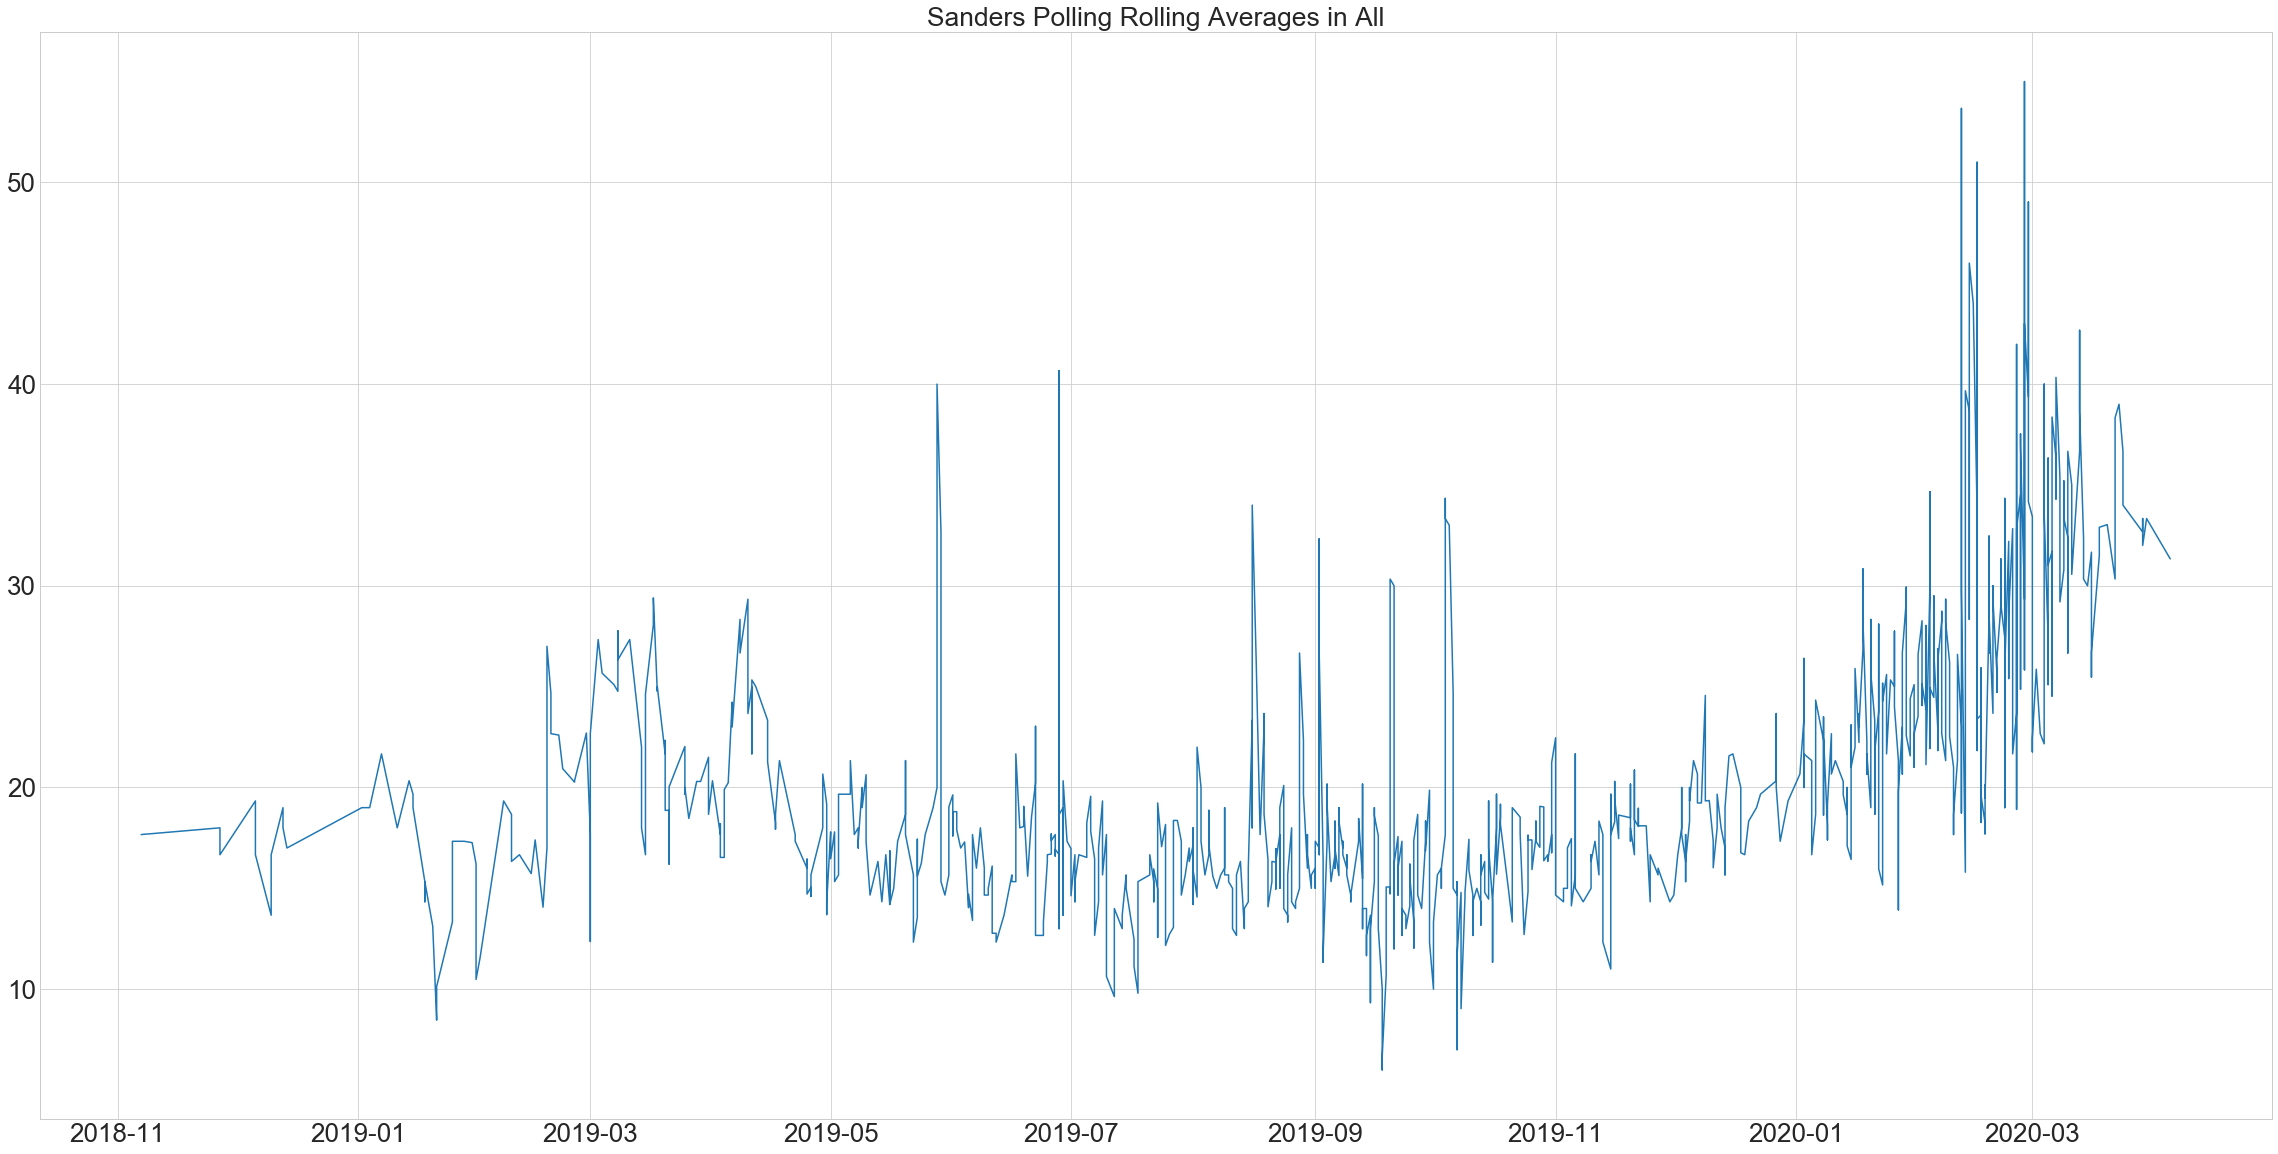

In [223]:
fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(sanders["start_date_ts"], sanders["rollingMean"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
#fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Sanders Polling Rolling Averages in All")
plt.show()

In [226]:
biden.set_index("start_date_ts", inplace = True)

In [227]:
rolling = biden.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
biden["rolling_mean"] = rolling_mean["pct"]

               level_0  index   question_id       poll_id   cycle  \
start_date_ts                                                       
2018-11-05         NaN    NaN           NaN           NaN     NaN   
2018-11-07         NaN    NaN           NaN           NaN     NaN   
2018-11-07         1.0    1.0  92393.000000  57072.666667  2020.0   
2018-11-27         2.0    2.0  92394.333333  57013.666667  2020.0   
2018-11-27         3.0    3.0  92395.000000  57065.000000  2020.0   
2018-12-06         4.0    4.0  92396.000000  57029.666667  2020.0   
2018-12-06         5.0    5.0  93025.000000  57048.666667  2020.0   
2018-12-06         6.0    6.0  93026.000000  57067.666667  2020.0   
2018-12-10         7.0    7.0  93027.000000  57104.666667  2020.0   
2018-12-10         8.0    8.0  92399.000000  57145.000000  2020.0   

               pollster_id  pollster_rating_id  sample_size  internal  \
start_date_ts                                                           
2018-11-05             Na

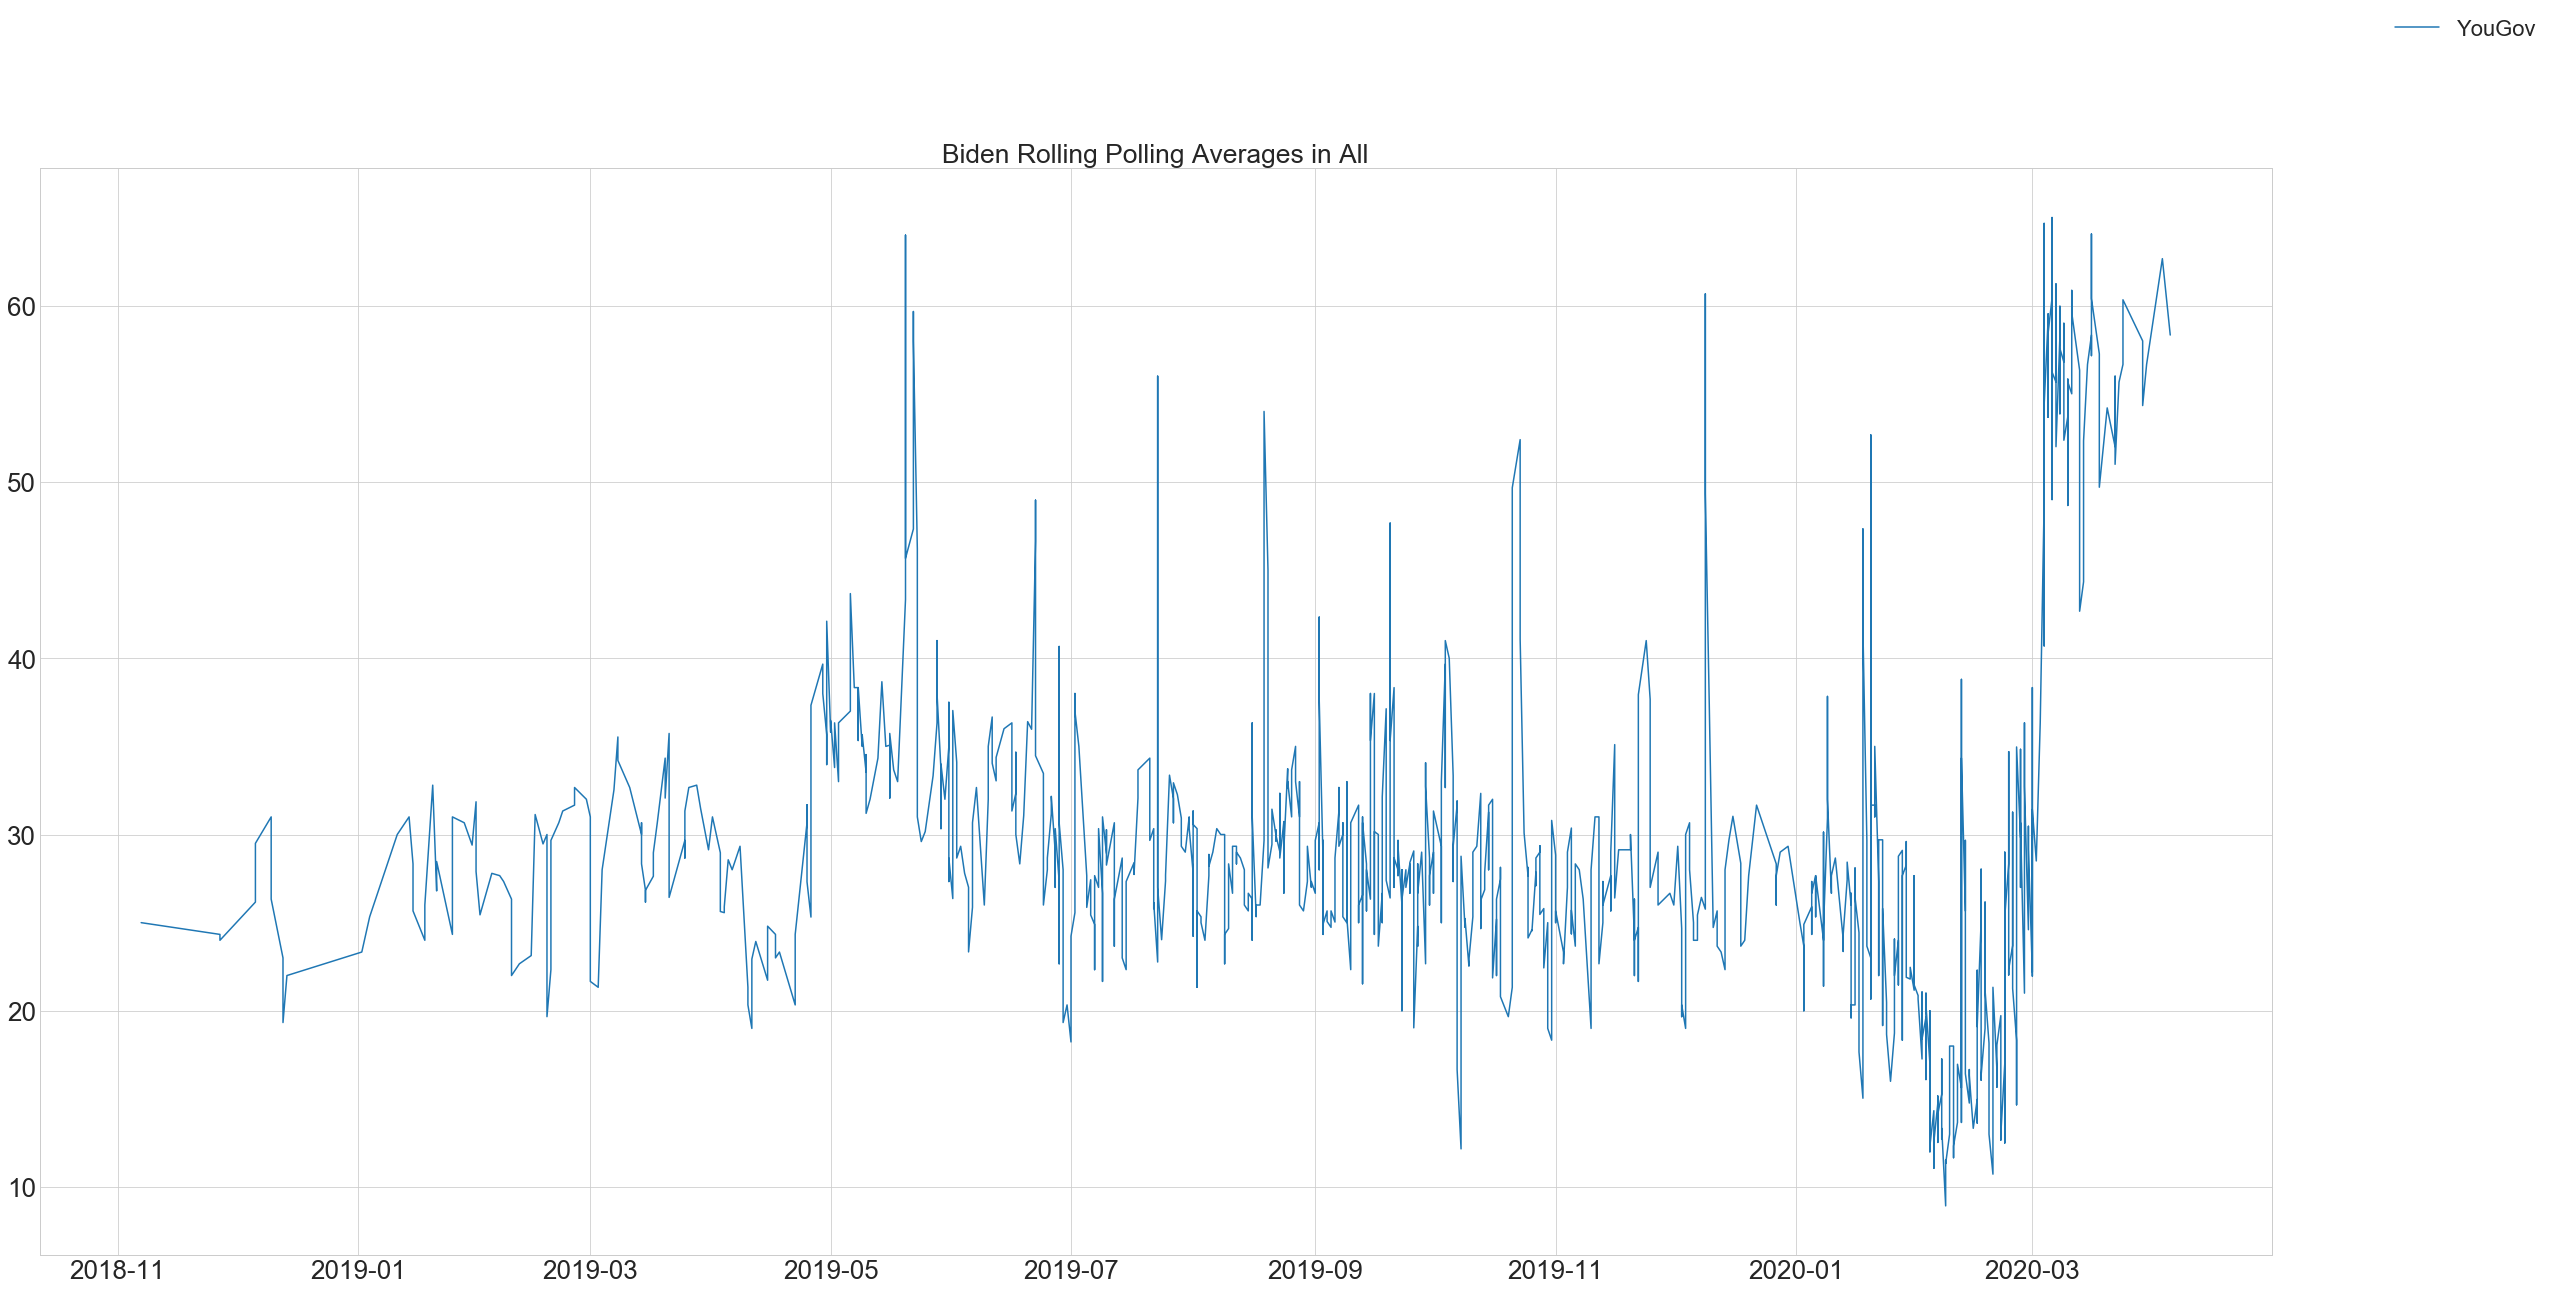

In [228]:
biden = biden.reset_index()
biden

fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(biden["start_date_ts"], biden["rolling_mean"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Biden Rolling Polling Averages in All")
plt.show()